#  Ames Housing - EDA and Data Cleaning

In [1]:
#  Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Use Seaborn formatting

sns.set()

In [2]:
#  Read the data

df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [3]:
#  View the data

df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#  View column info and data types

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
#  ID is merely an index column, so we drop it

df_train.drop(columns = 'Id',inplace = True)
df_test.drop(columns = 'Id',inplace = True)

In [7]:
#  Reformat column names

df_train.columns = [col.lower().replace(' ','_') for col in df_train.columns]
df_test.columns = [col.lower().replace(' ','_') for col in df_test.columns]

In [8]:
#  Quantity of nulls per column

df_train.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
garage_cars          1
garage_area          1
bsmtfin_sf_1         1
dtype: int64

In [9]:
df_test.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
bsmt_cond          25
bsmt_qual          25
mas_vnr_area        1
mas_vnr_type        1
electrical          1
dtype: int64

##  PID

Property IDs in Story County are organized in numeric groups.  
See https://www.storycountyiowa.gov/DocumentCenter/View/6074/A-Guide-to-Geo-Numbering-in-Story-County?bidId=

They are divided into regional groups by first number, followed by next two, 
followed by two groups of three.
These IDs are the only location info that we have, and as realtors know, the primary 
factors in housing price are 1. Location, 2. Location, and 3. Location.
The broader regional groups will be the most informative and the least likely 
to clutter our column space when we reach one-hot encoding, so we will use these categories only.



In [10]:
for df in [df_train,df_test]:
    df['pid_1'] = df['pid'].astype('str').str[:1]
    df['pid_2'] = df['pid'].astype('str').str[1:3]
    df.drop(columns = 'pid',inplace=True)

##  MS Subclass

This category is an amalgamation of housing style and year built, and its useful 
information is completely covered by these other categories.  Accordingly, we will
drop this category and rely on the independent, more specific categories.

In [11]:
df_train.drop(columns = 'ms_subclass',axis = 1, inplace = True)
df_test.drop(columns = 'ms_subclass',axis = 1, inplace = True)

## MS Zoning

In [12]:
df_train['ms_zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [13]:
df_train.groupby(['ms_zoning'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
ms_zoning,,,,,,,,
A (agr),2.0,47300.000000,48366.103833,13100.0,30200.0,47300.0,64400.0,81500.0
C (all),19.0,78010.894737,32781.478897,34900.0,50913.5,75000.0,105388.0,140000.0
FV,101.0,218618.316832,53063.423791,144152.0,176500.0,208900.0,254900.0,370878.0
I (all),1.0,57625.000000,NaN,57625.0,57625.0,57625.0,57625.0,57625.0
RH,14.0,148859.571429,35970.877401,82000.0,128500.0,152217.0,180000.0,200000.0
RL,1598.0,191235.164581,80380.790716,35000.0,137500.0,172500.0,222375.0,611657.0
RM,316.0,129119.142405,50776.911622,12789.0,103300.0,123900.0,141500.0,475000.0


Although these categories could probably be organized ordinally (especially
low, medium, and high-density residential), they are sufficiently noisy 
that we will preserve them as non-ordinal categories and process through one-hot encoding.

## Lot Frontage

This is our first category with null values.  Frontage should depend primarily
on lot area and lot shape (houses with street on multiple sides should have
proportionally more frontage, and the shape of cul-de-sacs generally results in 
less frontage, particularly at the terminal circle).

In [14]:
df_train.loc[df_train['lot_frontage'].isnull() == True,'lot_config'].value_counts()

Inside     190
Corner      67
CulDSac     61
FR2         11
FR3          1
Name: lot_config, dtype: int64

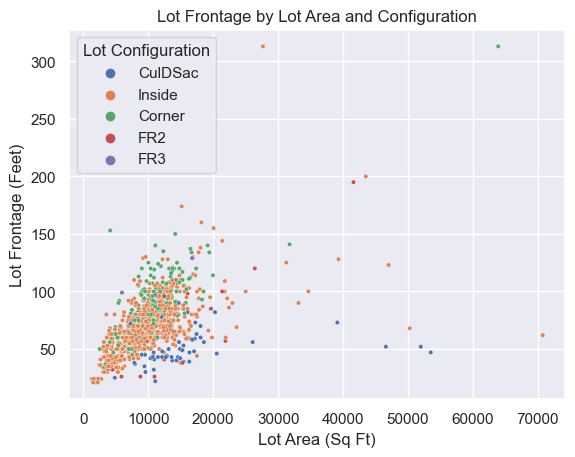

In [15]:
sns.scatterplot(data = df_train, 
                y = 'lot_frontage',
                x = 'lot_area',
                hue=df_train['lot_config'], s=10)
plt.xlabel('Lot Area (Sq Ft)')
plt.ylabel('Lot Frontage (Feet)')
plt.title('Lot Frontage by Lot Area and Configuration')
plt.legend(title = 'Lot Configuration');

In [16]:
#  Thankfully, none of the values in lot area or lot configuration are null

df_train[['lot_area','lot_config']].isnull().sum()

lot_area      0
lot_config    0
dtype: int64

In [17]:
#  Calculate ratio of frontage to lot area for each house

df_train['fr_rate'] = df_train['lot_frontage']/df_train['lot_area']

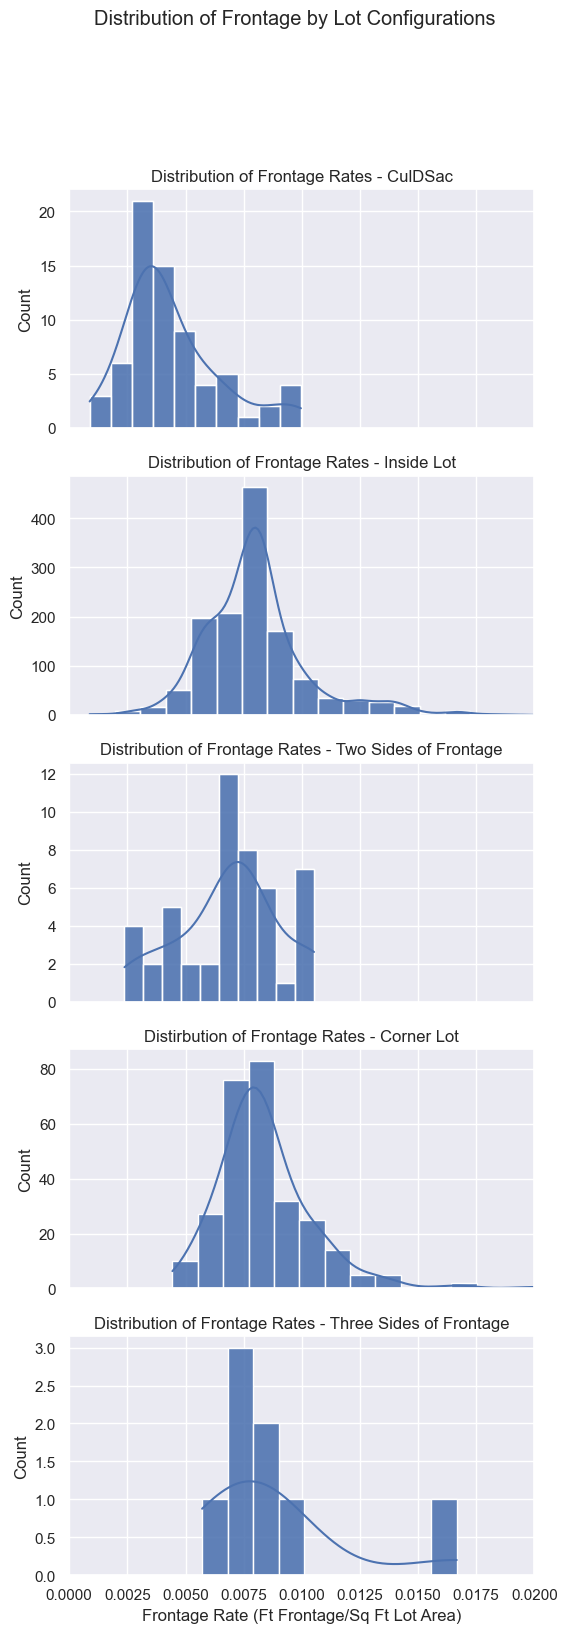

In [18]:
#  Plot distribution of frontage rate (histogram and smoothed kde) by lot configuration

fig, axs = plt.subplots(ncols = 1, 
                        nrows = 5,
                        figsize=(6,18),
                        sharex = True,
                       sharey = False)

sns.histplot(df_train[df_train['lot_config'] == 'CulDSac']['fr_rate'],
             ax = axs[0],
            bins = 10)

sns.histplot(df_train[df_train['lot_config'] == 'CulDSac']['fr_rate'],
             ax = axs[0],kde=True)


sns.histplot(df_train[df_train['lot_config'] == 'Inside']['fr_rate'],
             bins = 20, 
             ax = axs[1])

sns.histplot(df_train[df_train['lot_config'] == 'Inside']['fr_rate'],
             bins = 20,
             ax = axs[1],kde=True)

sns.histplot(df_train[df_train['lot_config'] == 'FR2']['fr_rate'],
             bins = 10, 
             ax = axs[2])

sns.histplot(df_train[df_train['lot_config'] == 'FR2']['fr_rate'],
             bins = 10, ax = axs[2],kde=True)


sns.histplot(df_train[df_train['lot_config'] == 'Corner']['fr_rate'],
             bins = 30, 
             ax = axs[3])

sns.histplot(df_train[df_train['lot_config'] == 'Corner']['fr_rate'],
            kde=True, bins = 30,
             ax = axs[3])


sns.histplot(df_train[df_train['lot_config'] == 'FR3']['fr_rate'],
             bins = 10, 
             ax = axs[4])

sns.histplot(df_train[df_train['lot_config'] == 'FR3']['fr_rate'],
            kde=True, bins = 10,
             ax = axs[4])


plt.suptitle('Distribution of Frontage by Lot Configurations')

axs[0].set_title('Distribution of Frontage Rates - CulDSac')
axs[1].set_title('Distribution of Frontage Rates - Inside Lot')
axs[2].set_title('Distribution of Frontage Rates - Two Sides of Frontage')
axs[3].set_title('Distirbution of Frontage Rates - Corner Lot')
axs[4].set_title('Distribution of Frontage Rates - Three Sides of Frontage')

axs[4].set_xlim(0,0.02)
axs[4].set_xlabel('Frontage Rate (Ft Frontage/Sq Ft Lot Area)')

axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
axs[2].set_ylabel('Count')
axs[3].set_ylabel('Count')
axs[4].set_ylabel('Count');




In [19]:
#  Fill missing lot frontage with lot area * frontage rate for house's lot configuration

df_train['lot_frontage'].fillna(df_train['lot_area'] * df_train.groupby('lot_config')['fr_rate'].transform('mean'),inplace=True)

In [20]:
df_test['lot_frontage'].fillna(df_test['lot_area'] * df_train.groupby('lot_config')['fr_rate'].transform('mean'),inplace=True)

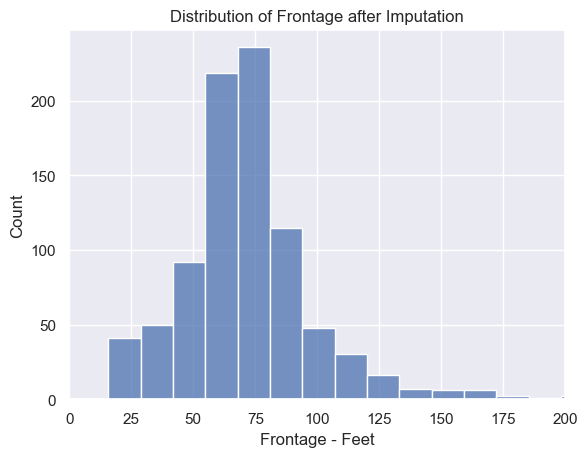

In [21]:
plt.title('Distribution of Frontage after Imputation')
plt.xlim(0,200)
plt.xlabel('Frontage - Feet')
sns.histplot(df_test['lot_frontage'],
             bins=100);

In [22]:
#  Frontage rate column is no longer useful, so we will drop it.

df_train.drop(columns = 'fr_rate',inplace=True)

## Lot Area

In [23]:
#  No nulls, all numeric.

df_train['lot_area'].describe()

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: lot_area, dtype: float64

## Street

In [24]:
#  Categorical - one-hot encoding

df_train['street'].value_counts()

Pave    2044
Grvl       7
Name: street, dtype: int64

In [25]:
df_train.groupby(['street'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
street,,,,,,,,
Grvl,7.0,86901.428571,38339.739652,50138.0,56809.0,78000.0,106175.0,154204.0
Pave,2044.0,181793.565558,79173.195670,12789.0,129975.0,163000.0,214000.0,611657.0


## Alley

In [26]:
df_train.groupby(['alley'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
alley,,,,,,,,
Grvl,85.0,120835.635294,35647.047030,35000.0,99900.0,118000.0,142900.0,256000.0
Pave,55.0,174534.709091,46295.412205,40000.0,152000.0,172500.0,193900.0,345000.0


In [27]:
df_train['alley'].isnull().mean()

0.931740614334471

93 % of values are missing for this feature.  
There is not enough background information to impute values. 
We will drop this column.

In [28]:
df_train.drop(columns = 'alley', inplace=True)
df_test.drop(columns = 'alley', inplace=True)

## Lot Shape

In [29]:
df_train['lot_shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: lot_shape, dtype: int64

In [30]:
df_train.groupby(['lot_shape'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
lot_shape,,,,,,,,
IR1,692.0,211848.670520,83359.764142,52000.0,157000.0,190000.0,250000.0,611657.0
IR2,55.0,233954.745455,89824.066055,109000.0,174000.0,217500.0,247700.0,538000.0
IR3,9.0,193182.222222,58500.737982,73000.0,163500.0,192140.0,220000.0,267000.0
Reg,1295.0,162925.812355,70198.139114,12789.0,120000.0,145000.0,185492.5,582933.0


Regularity/irregularity of lot shape is ordinal (at least conceptually, if not in terms of price).
We will rank ordinally in terms of irregularity.
<p>
Note:  We could use Ordinal Encoder during preprocessing for ordinal categories.  However, our ordinal
categories do not match in ranked subcategories, so there is little added efficiency or precision
in using Ordinal Encoder in the pipeline.  It is equally efficient to process them here during EDA.

In [31]:
df_train['lot_shape'].replace({'Reg':0,'IR1':1,'IR2':2,'IR3':3},inplace=True)
df_test['lot_shape'].replace({'Reg':0,'IR1':1,'IR2':2,'IR3':3},inplace=True)

## Land Contour

In [32]:
df_train['land_contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: land_contour, dtype: int64

In [33]:
df_train.groupby(['land_contour'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
land_contour,,,,,,,,
Bnk,80.0,142868.775000,49275.865018,52500.0,109625.0,137250.0,170000.0,315000.0
HLS,85.0,262353.376471,116726.453660,79275.0,173000.0,242000.0,355000.0,552000.0
Low,43.0,199313.116279,82609.276243,13100.0,143500.0,207000.0,270000.0,385000.0
Lvl,1843.0,178998.564840,75697.224509,12789.0,129500.0,161000.0,211000.0,611657.0


Slope is harder to evaluate ordinally (a depression is not necessarily more or 
less "sloped" than a hill.  This will be processed through one-hot encoding.

## Utilities

In [34]:
df_train['utilities'].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [35]:
df_train.groupby(['utilities'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
utilities,,,,,,,,
AllPub,2049.0,181551.602245,79244.116778,12789.0,129850.0,162500.0,214000.0,611657.0
NoSeWa,1.0,137500.000000,NaN,137500.0,137500.0,137500.0,137500.0,137500.0
NoSewr,1.0,57625.000000,NaN,57625.0,57625.0,57625.0,57625.0,57625.0


There are only two houses with substandard utilities.  However, their utilities
may be a significant factor in their low prices.  We will preserve the value
through one-hot encoding.

## Lot Config

In [36]:
df_train['lot_config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64

In [37]:
df_train.groupby(['lot_config'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
lot_config,,,,,,,,
Corner,348.0,180629.591954,74223.005036,44000.0,132000.0,161000.0,218209.0,468000.0
CulDSac,131.0,230744.358779,98419.411679,80000.0,158000.0,215000.0,269000.0,591587.0
FR2,60.0,174703.600000,60125.817532,81000.0,132500.0,162250.0,195750.0,394617.0
FR3,9.0,198600.000000,91734.412845,79000.0,119900.0,207000.0,296000.0,315000.0
Inside,1503.0,177537.014637,77749.368500,12789.0,128000.0,159000.0,206740.0,611657.0


Although an argument could be made for treating this as ordinal, we should preserve 
the feature as non-ordinal given the fact that we have already used the feature to impute another 

## Land Slope

In [38]:
df_train['land_slope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: land_slope, dtype: int64

In [39]:
df_train.groupby(['land_slope'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
land_slope,,,,,,,,
Gtl,1953.0,180358.476703,77897.279103,12789.0,129500.0,161000.0,212900.0,611657.0
Mod,88.0,204639.465909,102651.673838,13100.0,135125.0,188250.0,257682.0,552000.0
Sev,10.0,194598.000000,85068.824659,61000.0,131250.0,200750.0,270750.0,302000.0


This feature explicitly tells us the rate of slope.  We will treat it as ordinal.

In [40]:
df_train['land_slope'].replace({'Gtl':0,'Mod':1,'Sev':2},inplace=True)
df_test['land_slope'].replace({'Gtl':0,'Mod':1,'Sev':2},inplace=True)

## Neighborhood

In [41]:
df['neighborhood'].value_counts()

NAmes      133
CollgCr     87
OldTown     76
Somerst     52
Edwards     50
Gilbert     49
NridgHt     44
NWAmes      44
Sawyer      40
SawyerW     38
Mitchel     32
Crawfor     32
BrkSide     32
Timber      24
IDOTRR      24
NoRidge     23
ClearCr     17
SWISU       16
MeadowV     13
StoneBr     13
BrDale      11
Veenker      7
Blmngtn      6
NPkVill      6
Greens       5
Blueste      4
Name: neighborhood, dtype: int64

Neighborhood is categorical.  Evaluate through one-hot encoding.

## Proximity to "Conditions"

In [42]:
df_train.groupby(['condition_1'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
condition_1,,,,,,,,
Artery,70.0,128765.000000,58285.726961,50000.0,103150.0,118950.0,140750.0,475000.0
Feedr,109.0,143223.605505,45259.511847,35000.0,119600.0,140000.0,160000.0,269500.0
Norm,1767.0,185007.310130,79593.264680,12789.0,131125.0,167000.0,218000.0,611657.0
PosA,12.0,254733.333333,91755.092337,185000.0,188425.0,216000.0,276425.0,455000.0
PosN,27.0,254794.296296,117428.552257,109500.0,172000.0,214500.0,295500.0,591587.0
RRAe,21.0,139685.714286,21115.617105,87000.0,129000.0,142500.0,150000.0,184000.0
RRAn,36.0,172604.777778,55498.209382,79500.0,140150.0,167250.0,187460.0,336820.0
RRNe,3.0,129616.666667,37705.315717,93850.0,109925.0,126000.0,147500.0,169000.0
RRNn,6.0,198208.333333,76223.096347,128000.0,134687.5,184000.0,237250.0,320000.0


In [43]:
df_train.groupby(['condition_2'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
condition_2,,,,,,,,
Artery,5.0,119050.000000,19445.757892,95000.0,108000.0,118000.0,128250.0,146000.0
Feedr,11.0,129181.818182,40785.581231,79500.0,99500.0,128000.0,143250.0,220000.0
Norm,2025.0,181382.075556,78604.763227,12789.0,130000.0,163000.0,214000.0,611657.0
PosA,3.0,390666.666667,65010.255601,325000.0,358500.0,392000.0,423500.0,455000.0
PosN,3.0,395666.666667,67633.817971,334000.0,359500.0,385000.0,426500.0,468000.0
RRAe,1.0,190000.000000,NaN,190000.0,190000.0,190000.0,190000.0,190000.0
RRAn,1.0,136905.000000,NaN,136905.0,136905.0,136905.0,136905.0,136905.0
RRNn,2.0,96750.000000,39951.533137,68500.0,82625.0,96750.0,110875.0,125000.0


In [44]:
df_train[df_train['condition_2'] !='Norm'][['condition_1','condition_2']]

,condition_1,condition_2
77,Feedr,RRNn
105,RRAn,Feedr
252,RRAn,Feedr
258,Artery,Artery
356,Feedr,Feedr
517,PosA,PosA
588,RRAn,Feedr
682,PosN,PosN
685,PosN,PosN
756,PosN,PosN


If Condition 2 is the same as Condition 1, they are probably redundant.  (It is highly 
unlikely that a house borders two arteries, etc.).  We drop Condition 2 if it is identical
to Condtion 1.

In [45]:
df_train.loc[df_train['condition_1'] == df_train['condition_2'],'condition_2'] = 'Norm'
df_test.loc[df_test['condition_1'] == df_test['condition_2'],'condition_2'] = 'Norm'

## Building Type

In [46]:
df_train.groupby(['bldg_type'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
bldg_type,,,,,,,,
1Fam,1700.0,185275.685882,81912.397035,12789.0,130500.0,165200.0,219282.5,611657.0
2fmCon,46.0,123179.891304,30304.813341,55000.0,101187.5,121200.0,139875.0,200000.0
Duplex,75.0,139296.333333,40824.044796,62500.0,118250.0,136000.0,148991.5,269500.0
Twnhs,69.0,133100.000000,37977.260030,73000.0,100000.0,134000.0,160000.0,230000.0
TwnhsE,161.0,198312.372671,65866.184832,79400.0,147000.0,184000.0,234250.0,392500.0


Categorical - OHE

## House Style (floors)

In [47]:
df_train['house_style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

In [48]:
df_train.groupby(['house_style'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
house_style,,,,,,,,
1.5Fin,218.0,136480.091743,44910.975892,37900.0,113250.00,128700.0,149375.0,410000.0
1.5Unf,12.0,112466.666667,21111.364166,64500.0,107925.00,113000.0,122250.0,139400.0
1Story,1059.0,179809.194523,81725.146760,12789.0,128000.00,156000.0,214000.0,611657.0
2.5Fin,6.0,243666.666667,128464.262216,104000.0,192500.00,198500.0,271250.0,475000.0
2.5Unf,14.0,191785.714286,87041.483100,101000.0,133125.00,165500.0,212125.0,415000.0
2Story,598.0,206408.963211,82240.431218,40000.0,152768.75,189000.0,243875.0,584500.0
SFoyer,50.0,149343.920000,31859.449693,73000.0,130475.00,147500.0,169625.0,224500.0
SLvl,94.0,166248.989362,37262.422556,91000.0,145000.00,164750.0,177875.0,345000.0


Categorical - OHE

## Quality/Condition Columns - Numeric

In [49]:
df_train['overall_qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: overall_qual, dtype: int64

In [50]:
df_train['overall_cond'].value_counts()

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: overall_cond, dtype: int64

These condition features are ordinal and numeric, with no nulls.
We will preserve them as is.

## Year Built/Remod

In [51]:
df_train['year_built'].describe()

count    2051.000000
mean     1971.708922
std        30.177889
min      1872.000000
25%      1953.500000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: year_built, dtype: float64

In [52]:
df_train['year_remod/add'].describe()

count    2051.000000
mean     1984.190151
std        21.036250
min      1950.000000
25%      1964.500000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: year_remod/add, dtype: float64

Numeric, no nulls.

##  Roof

In [53]:
df_train['roof_style'].value_counts()

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: roof_style, dtype: int64

In [54]:
df_train.groupby(['roof_style'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
roof_style,,,,,,,,
Flat,13.0,191613.076923,61659.734752,113500.0,129000.0,167000.0,242000.0,274970.0
Gable,1619.0,171264.253243,64948.908434,12789.0,128000.0,159000.0,203000.0,475000.0
Gambrel,12.0,138208.333333,66068.524459,40000.0,93725.0,125250.0,172500.0,259500.0
Hip,397.0,224366.654912,112153.404004,50138.0,140000.0,180500.0,290000.0,611657.0
Mansard,7.0,152642.857143,80646.716344,44000.0,108500.0,150000.0,182500.0,292500.0
Shed,3.0,208666.666667,63105.731383,157000.0,173500.0,190000.0,234500.0,279000.0


In [55]:
df_train.groupby(['roof_matl'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
roof_matl,,,,,,,,
ClyTile,1.0,160000.000000,NaN,160000.0,160000.0,160000.0,160000.0,160000.0
CompShg,2025.0,180849.197037,79013.718606,12789.0,129500.0,161500.0,213000.0,611657.0
Membran,1.0,241500.000000,NaN,241500.0,241500.0,241500.0,241500.0,241500.0
Tar&Grv,15.0,187948.933333,56957.886372,113500.0,137000.0,167000.0,246382.0,274970.0
WdShake,4.0,264250.000000,49562.250420,190000.0,262750.0,287250.0,288750.0,292500.0
WdShngl,5.0,339400.000000,88618.846754,278000.0,279000.0,280000.0,385000.0,475000.0


Categorical - OHE

##  Quality/Condition Columns - Categorical 

In [56]:
for col in ['exter_qual','exter_cond','bsmt_qual','bsmt_cond',
            'heating_qc','kitchen_qual','fireplace_qu','garage_qual',
            'garage_cond','pool_qc','bsmt_exposure']:
    print(df[col].value_counts())

TA    552
Gd    292
Ex     25
Fa      9
Name: exter_qual, dtype: int64
TA    770
Gd     84
Fa     18
Ex      5
Po      1
Name: exter_cond, dtype: int64
TA    396
Gd    355
Ex     73
Fa     28
Po      1
Name: bsmt_qual, dtype: int64
TA    781
Fa     39
Gd     33
Name: bsmt_cond, dtype: int64
Ex    429
TA    267
Gd    157
Fa     25
Name: heating_qc, dtype: int64
TA    447
Gd    354
Ex     53
Fa     23
Po      1
Name: kitchen_qual, dtype: int64
Gd    220
TA    193
Fa     16
Po     15
Ex     12
Name: fireplace_qu, dtype: int64
TA    782
Fa     42
Gd      6
Po      3
Name: garage_qual, dtype: int64
TA    796
Fa     27
Po      6
Gd      3
Ex      1
Name: garage_cond, dtype: int64
Ex    3
TA    1
Name: pool_qc, dtype: int64
No    567
Av    130
Gd     80
Mn     76
Name: bsmt_exposure, dtype: int64


These categories are ordinal.  Nulls likely represent houses which do not have the feature 
at all (e.g. garage quality is null for a house with no garage), so they will be placed at the 
bottom of the rank.

In [57]:
for col in ['exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc',
            'kitchen_qual','fireplace_qu','garage_qual','garage_cond','pool_qc','bsmt_exposure']:
    df_train[col].fillna('NONE',inplace=True)
    df_test[col].fillna('NONE',inplace=True)

In [58]:
for col in ['exter_qual','exter_cond','bsmt_qual','bsmt_cond','heating_qc','kitchen_qual','fireplace_qu','garage_qual','garage_cond','pool_qc']:
    df_train[col].replace({'NONE':0,'NA':0,'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)
    df_test[col].replace({'NONE':0,'NA':0,'No':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace=True)

## Basement

According to the data dictionary, basement type is ordinal.  It will be processed accordingly.<p>
Nulls likely have no basement at all, so nulls in categorical features will move to the bottom of the 
rank and nulls in numeric features will be filled as 0.

In [59]:
print(df_train['bsmtfin_type_1'].value_counts())
print(df_train['bsmtfin_type_2'].value_counts())

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64
Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64


In [60]:
df_train.groupby(['bsmtfin_type_1'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
bsmtfin_type_1,,,,,,,,
ALQ,293.0,164368.017065,50942.184107,79275.0,130500.0,152500.0,180000.0,538000.0
BLQ,200.0,150107.020000,43436.441698,35311.0,125375.0,142500.0,163750.0,345000.0
GLQ,615.0,237597.245528,87455.995175,73000.0,177000.0,217000.0,284500.0,611657.0
LwQ,102.0,153266.921569,51833.183880,61500.0,123125.0,139000.0,171750.0,315000.0
Rec,183.0,143263.382514,51214.300952,34900.0,120000.0,135000.0,157250.0,584500.0
Unf,603.0,166155.257048,72618.244750,12789.0,117800.0,155835.0,193500.0,582933.0


In [61]:
df_train.groupby(['bsmtfin_type_2'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
bsmtfin_type_2,,,,,,,,
ALQ,35.0,188567.142857,91516.726969,99500.0,129100.0,162000.0,212750.00,555000.0
BLQ,48.0,156659.020833,55564.508874,62383.0,124875.0,140500.0,174625.00,417500.0
GLQ,23.0,221300.000000,103403.449696,84500.0,150450.0,217500.0,255750.00,584500.0
LwQ,60.0,162284.583333,42446.920765,88000.0,135500.0,154000.0,178468.75,287000.0
Rec,80.0,164538.750000,54047.229097,85000.0,134100.0,151750.0,174212.50,402000.0
Unf,1749.0,185221.284162,80445.614944,12789.0,130000.0,167000.0,219000.00,611657.0


In [62]:
for col in ['bsmtfin_type_1','bsmtfin_type_2']:
    df_train[col].fillna('NONE',inplace=True)
    df_test[col].fillna('NONE',inplace=True)

In [63]:
for col in ['bsmtfin_type_1','bsmtfin_type_2']:
    for df in [df_train,df_test]:
        df[col].replace({'NONE':0,'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},inplace=True)

In [64]:
df_train.loc[[616,1327],['bsmt_full_bath','bsmt_half_bath','bsmtfin_sf_1','bsmt_unf_sf','bsmtfin_sf_2','total_bsmt_sf']]

,bsmt_full_bath,bsmt_half_bath,bsmtfin_sf_1,bsmt_unf_sf,bsmtfin_sf_2,total_bsmt_sf
616,NaN,NaN,0.0,0.0,0.0,0.0
1327,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
for col in ['bsmt_full_bath','bsmt_half_bath','bsmtfin_sf_1','bsmt_unf_sf','bsmtfin_sf_2','total_bsmt_sf']:
    df_train[col].fillna(0,inplace=True)
    df_test[col].fillna(0,inplace=True)

Basement exposure is ordinal.

In [66]:
df_train['bsmt_exposure'].replace({'NONE':0,'No':0,'Mn':1,'Av':2,'Gd':3},inplace=True)
df_test['bsmt_exposure'].replace({'NONE':0,'No':0,'Mn':1,'Av':2,'Gd':3},inplace=True)

## Garage

Same logic as basement.  One-hot encoding for categoricals.  Assume that missing values
do not have a garage - bottom of the list if ordinal, and 0 if numeric.

In [67]:
df_train['garage_type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [68]:
df_train.groupby(['garage_type'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
garage_type,,,,,,,,
2Types,19.0,157184.210526,33828.017040,87000.0,143050.00,150000.0,170500.0,235000.0
Attchd,1213.0,205040.195383,76940.432090,13100.0,150000.00,185850.0,238500.0,611657.0
Basment,27.0,143242.333333,39079.659751,55993.0,122875.00,145000.0,159000.0,235000.0
BuiltIn,132.0,247883.522727,99764.995090,91000.0,176954.25,221900.0,292809.0,582933.0
CarPort,11.0,103823.545455,19675.502999,82000.0,89375.00,101800.0,108479.5,148000.0
Detchd,536.0,132132.947761,40575.547690,12789.0,110000.00,129500.0,147425.0,475000.0


In [69]:
df_train['garage_type'].fillna('NONE',inplace=True)
df_test['garage_type'].fillna('NONE',inplace=True)

In [70]:
df_train.groupby(['garage_yr_blt'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
garage_yr_blt,,,,,,,,
1895.0,1.0,89000.000000,NaN,89000.0,89000.00,89000.0,89000.00,89000.0
1896.0,1.0,50138.000000,NaN,50138.0,50138.00,50138.0,50138.00,50138.0
1900.0,3.0,128966.666667,41087.751622,86900.0,108950.00,131000.0,150000.00,169000.0
1910.0,5.0,105300.000000,32774.990465,50000.0,106000.00,111000.0,127500.00,132000.0
1914.0,2.0,150943.500000,17050.465815,138887.0,144915.25,150943.5,156971.75,163000.0
...,...,...,...,...,...,...,...,...
2007.0,84.0,250276.630952,80992.649723,112000.0,181938.75,235063.0,297437.75,500067.0
2008.0,44.0,299296.727273,97265.344742,127500.0,228600.00,290083.5,368212.25,555000.0
2009.0,17.0,339983.941176,136114.059595,173733.0,222000.00,308030.0,398800.00,611657.0


In [71]:
df_train['garage_yr_blt'].value_counts().head(50)

2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
1977.0     46
1998.0     45
2008.0     44
2000.0     41
2002.0     40
1999.0     39
1976.0     35
1993.0     34
1978.0     33
1950.0     32
1958.0     32
1968.0     32
1956.0     31
1996.0     31
1966.0     29
2001.0     27
1965.0     27
1997.0     26
1967.0     26
1995.0     26
1994.0     25
1979.0     25
1964.0     25
1954.0     25
1975.0     25
1962.0     25
1959.0     23
1963.0     22
1980.0     22
1992.0     22
1990.0     21
1920.0     21
1960.0     21
1970.0     20
1957.0     20
1973.0     20
1930.0     20
1940.0     20
1961.0     20
1974.0     19
1953.0     19
1971.0     18
1969.0     18
1972.0     17
2009.0     17
Name: garage_yr_blt, dtype: int64

In [72]:
df_train['garage_yr_blt'].fillna(0,inplace=True)
df_test['garage_yr_blt'].fillna(0,inplace=True)

### -- Garage Finish

In [73]:
df_train.groupby(['garage_finish'])['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
garage_finish,,,,,,,,
Fin,509.0,239800.664047,90474.520620,102900.0,175000.0,215000.0,287000.0,611657.0
RFn,579.0,204792.036269,69739.691832,50138.0,156250.0,190550.0,235064.0,584500.0
Unf,849.0,140718.148410,44434.590021,12789.0,115400.0,135000.0,157000.0,475000.0


This category is ordinal.  Nulls have no garage.

In [74]:
df_train['garage_finish'].fillna(0,inplace=True)
df_test['garage_finish'].fillna(0,inplace=True)

In [75]:
df_train['garage_finish'].replace({'None':0,'Unf':1,'RFn':2,'Fin':3},inplace=True)
df_test['garage_finish'].replace({'None':0,'Unf':1,'RFn':2,'Fin':3},inplace=True)

### -- Garage Area/Cars

One house has a detached garage, with null area and number of cars.
We can impute values based on the mean area and cars for detached garages.

In [76]:
df_train.loc[df_train['garage_area'].isnull() == True,['garage_cars','garage_type']]

,garage_cars,garage_type
1712,NaN,Detchd


In [77]:
df_train.groupby('garage_type')[['garage_area','garage_cars']].mean()

,garage_area,garage_cars
garage_type,,
2Types,799.210526,2.842105
Attchd,527.614180,1.968673
Basment,435.592593,1.555556
BuiltIn,567.681818,2.318182
CarPort,426.818182,1.636364
Detchd,419.543925,1.558879
NONE,0.000000,0.000000


In [78]:
df_train.groupby('garage_type')['garage_cars'].value_counts()

garage_type  garage_cars
2Types       3.0             10
             2.0              6
             4.0              3
Attchd       2.0            768
             1.0            244
             3.0            196
             4.0              5
Basment      2.0             15
             1.0             12
BuiltIn      2.0             69
             3.0             48
             1.0             12
             4.0              3
CarPort      1.0              5
             2.0              5
             3.0              1
Detchd       2.0            273
             1.0            251
             3.0              8
             4.0              2
             5.0              1
NONE         0.0            113
Name: garage_cars, dtype: int64

Number of cars in a garage is discrete.  It is tempting to impute the mean of 1.55, 
but the proper approach is to round to the nearest discrete value.

In [79]:
df_train.loc[1712,['garage_area','garage_cars']] = [419.54,2]

## Fence/Miscellaneous

Categorical - OHE.  If null, house does not have the feature, so fill with "NONE."

In [80]:
df_train['fence'].fillna('NONE',inplace=True)
df_test['fence'].fillna('NONE',inplace=True)

In [81]:
df_train['misc_feature'].fillna('NONE',inplace=True)
df_test['misc_feature'].fillna('NONE',inplace=True)

## Masonry

If null, does not have masonry.  Impute "none" for type and 0 for area.

In [82]:
df_train['mas_vnr_area'].value_counts()

0.0      1216
120.0      11
176.0      10
200.0      10
108.0       9
         ... 
142.0       1
215.0       1
235.0       1
233.0       1
426.0       1
Name: mas_vnr_area, Length: 373, dtype: int64

In [83]:
df_train['mas_vnr_area'].fillna(0,inplace=True)
df_test['mas_vnr_area'].fillna(0,inplace=True)

In [84]:
df_train['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [85]:
df_train['mas_vnr_type'].fillna('NONE',inplace=True)
df_test['mas_vnr_type'].fillna('NONE',inplace=True)

##  Electrical

There is one null for electrical.  Most houses, especially newer ones, have circuit breakers.  
This house is less than 20 years old.  It likely has a circuit breaker.

In [86]:
df_test['electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [87]:
df_test.loc[df_test['electrical'].isnull() == True,'year_built']

634    2006
Name: year_built, dtype: int64

In [88]:
df_test.groupby('electrical')['year_built'].mean()

electrical
FuseA    1937.229167
FuseF    1928.533333
FuseP    1910.000000
SBrkr    1973.260763
Name: year_built, dtype: float64

In [89]:
df_test.loc[634,'electrical'] = 'SBrkr'

## Functionality

In [90]:
df_train['functional'].value_counts()

Typ     1915
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: functional, dtype: int64

This category is ordinal, and is encoded as such.

In [91]:
df_train['functional'].replace({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,
                                'Min2':5,'Min1':6,'Typ':7},inplace=True)


df_test['functional'].replace({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,
                                'Min2':5,'Min1':6,'Typ':7},inplace=True)

## Driveway

Although one could argue that this category is ordinal, there is a chance that partial paving
could be more or less desirable than complete paving or non-paving.  (People might not like a job 
that is half-done).  Processing as OHE rather than ordinal only adds one feature, so it will
not contribute significantly to overfitting.  

In [92]:
df_train['paved_drive'].value_counts()

Y    1861
N     151
P      39
Name: paved_drive, dtype: int64

## Exterior - 1st and 2nd

Nearly all of the houses have only one type of exterior.  Most of the "Exterior 2nd"s are either
identical to the 1st, or at least functionally equivalent.  
We will impute Exterior 2nd to Exterior 1st if Exterior 1st is missing, and otherwise drop Exterior 2nd.

In [93]:
df_train.loc[df_train['exterior_1st'] != df_train['exterior_2nd'],['exterior_1st','exterior_2nd']].value_counts().head(50)

exterior_1st  exterior_2nd
CemntBd       CmentBd         89
WdShing       Wd Shng         34
HdBoard       Plywood         27
BrkFace       Wd Sdng         15
Plywood       Brk Cmn         14
Wd Sdng       Plywood         13
              Wd Shng         12
WdShing       Plywood          9
VinylSd       Wd Shng          7
BrkFace       Plywood          6
Plywood       HdBoard          6
Wd Sdng       HdBoard          5
AsbShng       Plywood          4
HdBoard       Wd Shng          4
              ImStucc          4
BrkComm       Brk Cmn          3
HdBoard       Wd Sdng          3
Wd Sdng       VinylSd          3
Stucco        Wd Shng          3
Plywood       Wd Sdng          3
              ImStucc          3
BrkFace       Stone            3
              HdBoard          2
              MetalSd          2
MetalSd       Stucco           2
              VinylSd          2
              Wd Sdng          2
Wd Sdng       Stucco           2
BrkFace       Stucco           2
Wd Sdng       Im

In [94]:
df_train['exterior_1st'].fillna(df_train['exterior_2nd'],inplace=True)

In [95]:
df_test['exterior_1st'].fillna(df_test['exterior_2nd'],inplace=True)

In [96]:
df_train.drop(columns='exterior_2nd',inplace=True)
df_test.drop(columns='exterior_2nd',inplace=True)

#  Checking Our Work

In [97]:
#  All nulls resolved

df_train.isnull().sum().value_counts()

0    78
dtype: int64

In [98]:
df_test.isnull().sum().value_counts()

0    77
dtype: int64

#  Saving Our Data

We will preserve our efforts in cleaning the data by saving it to our output folder 
(without an index column, to prevent unnecessary complications in future steps).

In [99]:
df_train.to_csv('./output/train_cleaned.csv',index=False)


In [100]:
df_test.to_csv('./output/test_cleaned.csv',index=False)